<a href="https://colab.research.google.com/github/CrowdSalat/ann-dynamical-systems/blob/master/explore_xplane_dataset_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# explore xplane data

## pip install (normal jupyter only)

In [0]:
# only be relevant for 'not colab' notebooks. colab got these pre installed. 
! pip3 install pandas
! pip3 install matplotlib
! pip3 install googledrivedownloader
! pip3 install requests #for googledrivedownloader
! pip3 install pandas
! pip3 install scikit-learn
#consider using conda as package manager, because it uses already compiled libs.
# tf is considerably faster when installed with conda according to: TODO find website..
! pip3 install tensorflow 


## imports

In [0]:
from google_drive_downloader import GoogleDriveDownloader as gdd
import pandas as pd
import os, sys
import csv

from google.colab import files

%matplotlib inline
import matplotlib.pyplot as plt

## load csv files 

In [0]:
file_mismatch = 'trainingsset_mismatch_00.csv'
file0 = 'trainingsset_00.csv'
data0 = 'dataset_00.csv'
data1 = 'dataset_01.csv'
data2 = 'dataset_02.csv'
data3 = 'dataset_03.csv'
files = [file_mismatch, file0, data0, data1, data2, data3]

### in collab 
just mount the drive to access the files:

In [0]:
from google.colab import drive
drive.mount('/content/drive')

root_dir = '/content/drive/My Drive/xplane_data' 
os.chdir(root_dir)
print ('working dir: ' + os.getcwd())


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
working dir: /content/drive/My Drive/xplane_data


### in normal jupyter notebook 
download the files from google drive to your local working directory:


In [0]:
root_dir = os.getcwd()

if not root_dir.endswith('data'):
  os.mkdir('./data')
  os.chdir('./data')


print ('working dir: ' + root_dir)


gdd.download_file_from_google_drive(file_id='14qCHOrPH8aDUY_AvzzYpORNhW0PFXkC_',
                                    dest_path='./'+file_mismatch,
                                    )

gdd.download_file_from_google_drive(file_id='1h6y6kWLPduY_gKPM0-GVt4t57uF1_Wr6',
                                    dest_path='./'+file0,
                                    )

gdd.download_file_from_google_drive(file_id='1twaC4u2at1Zo6_Sr6gJNTT5Q6D2hwLfO',
                                    dest_path='./'+data0,
                                    )

gdd.download_file_from_google_drive(file_id='1vF_WVJV8QRXSEjetgJ-5-xn1xz8JqrMJ',
                                    dest_path='./'+data1,
                                    )

gdd.download_file_from_google_drive(file_id='1Jenfbg0nyXy4GgN4fkkZxwzlTfcugFvj',
                                    dest_path='./'+data2,
                                    )

gdd.download_file_from_google_drive(file_id='1rN6oL_-xbc0MIC2KJnPLC0f-sKB__XTm',
                                    dest_path='./'+data3,
                                    )


https://drive.google.com/open?id=
#alternativly save all as zip an extract them:
#gdd.download_file_from_google_drive(file_id='',
#                                    dest_path='./data/traindata.zip',
#       

working dir: /content/drive/My Drive/xplane_data


## check and parse csv data

Following xplane dataoutputs are activated:

1   Times

3   Speeds

4   Mach, VVI, g-loads 

8   Joystick aileron, elevator, and rudder input 

10  Artificial stability inputs for aileron, elevator, and rudder

11  Flight control deflections for aileron, elevator, and rudder 

15  Angular moments (Not in use)

16  Angular velocities 

17  Pitch, roll, headings

18  Angle of attack, sideslip, and paths (Not in use)

20  Latitude, longitude, and altitude

138 Servo aileron/elevator/rudder

### check for formatation error and print headers

In [0]:
# xplane somehow messes up the csv files, therefor check if column count in head and data machtes
# if so, save all header names in list and print them
print ('working dir: ' + os.getcwd())

headers = {}

for file in files:
  with open(file) as csvfile:
    csvreader = csv.reader(csvfile, delimiter='|')
    header = next(csvreader)
    data =next(csvreader)
    if len(header) == len(data): 
      header = header[:-1] # last on in header and data is just space
      headers[file] = header
      print(file + ': is ok.' )
    else:
      print(file + ': got mismatched header and data columns.' )

for header_val in headers.values():
  print(header_val)

print('')


working dir: /content/drive/My Drive/xplane_data
trainingsset_mismatch_00.csv: got mismatched header and data columns.
trainingsset_00.csv: is ok.
dataset_00.csv: is ok.
dataset_01.csv: is ok.
dataset_02.csv: is ok.
['  _real,_time ', '   _totl,_time ', '   missn,_time ', '   timer,_time ', '   _zulu,_time ', '   local,_time ', '   hobbs,_time ', '   _Vind,_kias ', '   _Vind,_keas ', '   Vtrue,_ktas ', '   Vtrue,_ktgs ', '   _Vind,__mph ', '   Vtrue,mphas ', '   Vtrue,mphgs ', '   _Mach,ratio ', '   __VVI,__fpm ', '   Gload,norml ', '   Gload,axial ', '   Gload,_side ', '   _elev,stick ', '   ailrn,stick ', '   ruddr,stick ', '   _elev,astab ', '   ailrn,astab ', '   ruddr,astab ', '   _elev,_surf ', '   ailrn,_surf ', '   ruddr,_surf ', '   nwhel,steer ', '   ____M,_ftlb ', '   ____L,_ftlb ', '   ____N,_ftlb ', '   ____Q,rad/s ', '   ____P,rad/s ', '   ____R,rad/s ', '   pitch,__deg ', '   _roll,__deg ', '   hding,_true ', '   hding,__mag ', '   alpha,__deg ', '   _beta,__deg ', '   h

### parse data

In [0]:
!ls -l

total 592331
-rw------- 1 root root  27185312 Oct  6 11:50 dataset_00.csv
-rw------- 1 root root      2487 Oct  6 11:27 dataset_00.log
-rw------- 1 root root  48922916 Oct  8 20:24 dataset_01.csv
-rw------- 1 root root      4810 Oct  6 15:44 dataset_01.log
-rw------- 1 root root 162292834 Oct  8 20:23 dataset_02.csv
-rw------- 1 root root     11468 Oct  7 19:37 dataset_02.log
-rw------- 1 root root  64855868 Oct  8 20:15 dataset_03.csv
drwx------ 2 root root      4096 Oct  6 13:30 diagramms
-rw------- 1 root root  27335214 Oct  6 11:26 dump_dataset_00.csv
-rw------- 1 root root  59198616 Oct  6 15:43 dump_dataset_01.csv
-rw------- 1 root root 162855986 Oct  7 19:41 dump_dataset_02.csv
-rw------- 1 root root  33909540 Oct  8 20:13 dump_dataset_03_fail1.csv
-rw------- 1 root root   8212542 Oct  2 09:19 trainingsset_00.csv
-rw------- 1 root root  11750732 Oct  2 09:34 trainingsset_mismatch_00.csv


**Viewed File is:**

In [0]:
print('Name file to view:')
slist = %sx read -p ''
current_file = slist[0]

Name file to view:


In [0]:
def load_xplane_csv(csv_path, columns):
    return pd.read_csv(csv_path, delimiter='|', usecols = columns,
                       float_precision='high') 


if not current_file.endswith('.csv'): 
  print('No valid file to view defined! ', current_file)
else:
  print('Current viewed file is: "{}"'.format(current_file))

Current viewed file is: "dataset_02.csv"


#### state

In [0]:
m_time      = '   missn,_time '
z_time      = '   _zulu,_time '
t_time      = '   _totl,_time '
yaw_v       = '   ____Q,rad/s '
heading_mag = '   hding,__mag '
yaw_deg     = '   _beta,__deg '
roll_deg    = '   _roll,__deg '
roll_v      = '   ____R,rad/s '
pitch_deg   = '   pitch,__deg '
pitch_v     = '   ____P,rad/s '
alt         = '   __alt,ftmsl '
vv          = '   __VVI,__fpm '
v           = '   Vtrue,_ktas '
rpm_prop    = '   rpm_1,_prop '
throttle     = '   thro1,_part '

state = [ m_time,
          t_time,
          yaw_v,
          yaw_deg,
          roll_deg,
          roll_v,
          pitch_deg,
          pitch_v,
          vv,
          alt,
          v,
          rpm_prop,
          throttle,
        ]

#all_columns = headers[file0]

df = load_xplane_csv(current_file, state)

shape = df.shape
min_val = df.max(axis=0)
max_val = df.min(axis=0)

print(shape)
df.head(2)

(125032, 13)


,"_totl,_time","missn,_time","Vtrue,_ktas","__VVI,__fpm","____Q,rad/s","____P,rad/s","____R,rad/s","pitch,__deg","_roll,__deg","_beta,__deg","__alt,ftmsl","thro1,_part","rpm_1,_prop"
0,18.92234,18.92234,120.99394,-108.27410,0.00084,0.00001,-0.00001,-1.59223,-0.16694,0.02205,912.21417,0.79608,2487.47949
1,19.02284,19.02284,121.00570,-106.94855,0.00084,0.00001,-0.00001,-1.58730,-0.16688,0.02206,912.05469,0.79608,2487.58545


#### action

In [0]:
elev_joystick               = '   _elev,stick '
ailrn_joystick               = '   ailrn,stick '
ruddr_joystick               = '   ruddr,stick '

elev_artificial_stability   = '   _elev,astab '
ailrn_artificial_stability   = '   ailrn,astab '
ruddr_artificial_stability   = '   ruddr,astab '

elev_deflect_to_pitch       = '   _elev,_surf '
ailrn_deflect_to_pitch       = '   ailrn,_surf '
ruddr_deflect_to_pitch       = '   ruddr,_surf '

elev_servo                  = '   _elev,servo '
ailrn_servo                  = '   ailrn,servo '
ruddr_servo                  = '   ruddr,servo '


actions = [
           t_time,
           m_time,
           elev_joystick, 
           ailrn_joystick, 
           ruddr_joystick, 
           elev_artificial_stability, 
           ailrn_artificial_stability, 
           ruddr_artificial_stability, 
           elev_deflect_to_pitch, 
           ailrn_deflect_to_pitch, 
           ruddr_deflect_to_pitch, 
           elev_servo , 
           ailrn_servo, 
           ruddr_servo         
]

df_actions = load_xplane_csv(current_file, actions)

## visualize data

The function save_plots_before_show overwrite old data, but google drive will version them.

In [0]:
def save_plots_before_show(diagramm_name):
  diagramm_suffix = current_file[:-4] + '_'
  diagramm_folder = './diagramms'

  if not os.path.exists(diagramm_folder):
      os.makedirs(diagramm_folder)

  plt.savefig(diagramm_folder + '/' + diagramm_suffix + diagramm_name +'.pdf')
  plt.savefig(diagramm_folder + '/' + diagramm_suffix + diagramm_name +'.svg')
  plt.savefig(diagramm_folder + '/' + diagramm_suffix + diagramm_name +'.png')

### state

In [0]:
df.describe()

,"_totl,_time","missn,_time","Vtrue,_ktas","__VVI,__fpm","____Q,rad/s","____P,rad/s","____R,rad/s","pitch,__deg","_roll,__deg","_beta,__deg","__alt,ftmsl","thro1,_part","rpm_1,_prop"
count,125032.000000,125032.000000,125032.000000,125032.000000,125032.000000,125032.000000,125032.000000,125032.000000,125032.000000,125032.000000,125032.000000,1.250320e+05,125032.000000
mean,3252.377780,44.428500,116.269757,40.662838,0.004084,0.000074,-0.002843,-0.497736,-1.158114,0.032279,3004.505059,7.960800e-01,2434.368407
std,1862.957656,47.399460,5.871824,160.056617,0.005675,0.018485,0.024969,1.151647,9.061487,0.135728,1244.957834,7.349706e-14,51.328746
min,18.922340,0.012780,87.328770,-533.604610,-0.022210,-0.088120,-0.054820,-3.663820,-20.248850,-0.499970,903.402770,7.960800e-01,2203.945310
25%,1641.939118,12.574667,116.202170,-0.654695,0.000860,-0.000660,-0.014550,-0.966300,-5.387742,-0.057790,1999.524660,7.960800e-01,2422.912418
50%,3256.095090,32.704520,117.806170,0.248325,0.001190,0.000010,-0.003230,-0.796475,-1.267045,0.033575,2999.054930,7.960800e-01,2444.398680
75%,4865.086795,57.335300,119.137395,10.063472,0.005280,0.001590,0.014310,-0.616520,4.992810,0.097300,3999.877750,7.960800e-01,2464.948490
max,6471.113280,328.820160,133.235340,582.662600,0.026290,0.090480,0.054840,5.206820,20.559520,0.346550,5006.040040,7.960800e-01,2582.455320


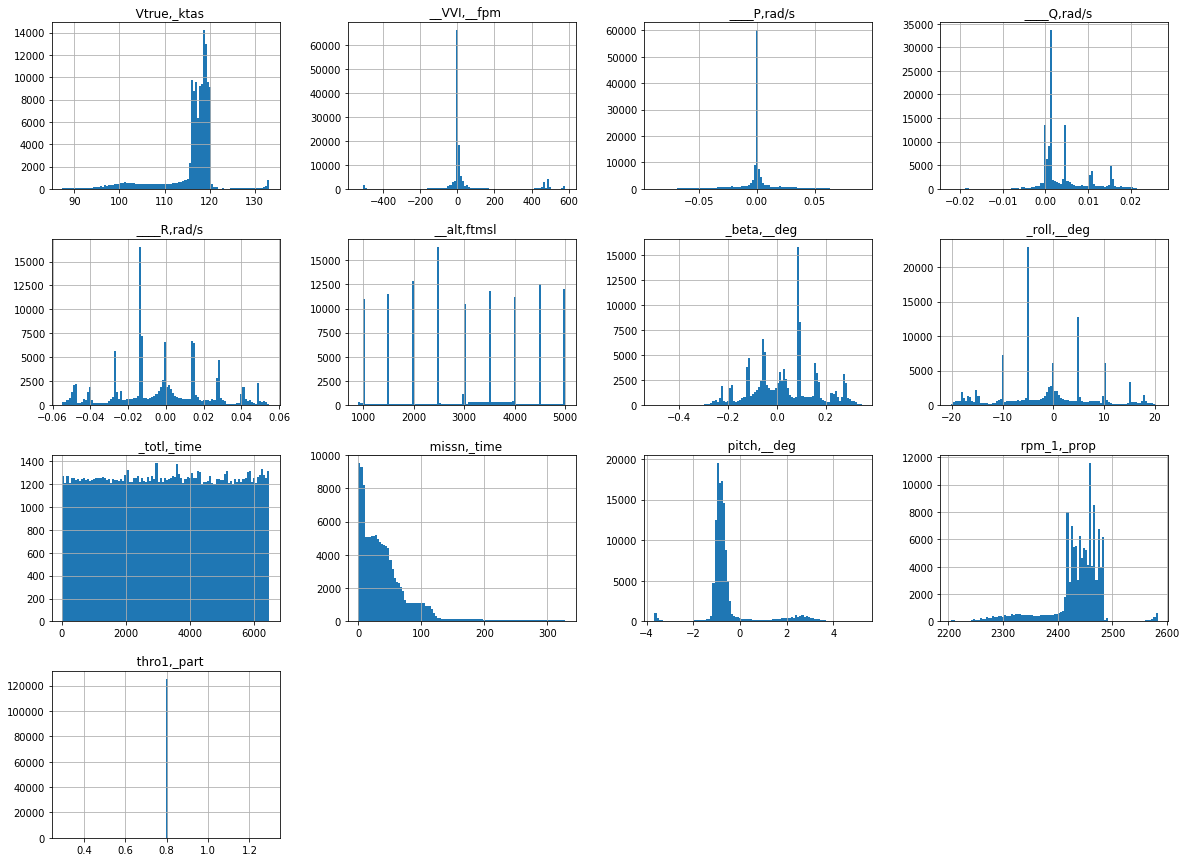

In [0]:
df.hist(bins=100, figsize=(20,15))
save_plots_before_show('state_histogramm')
plt.show()

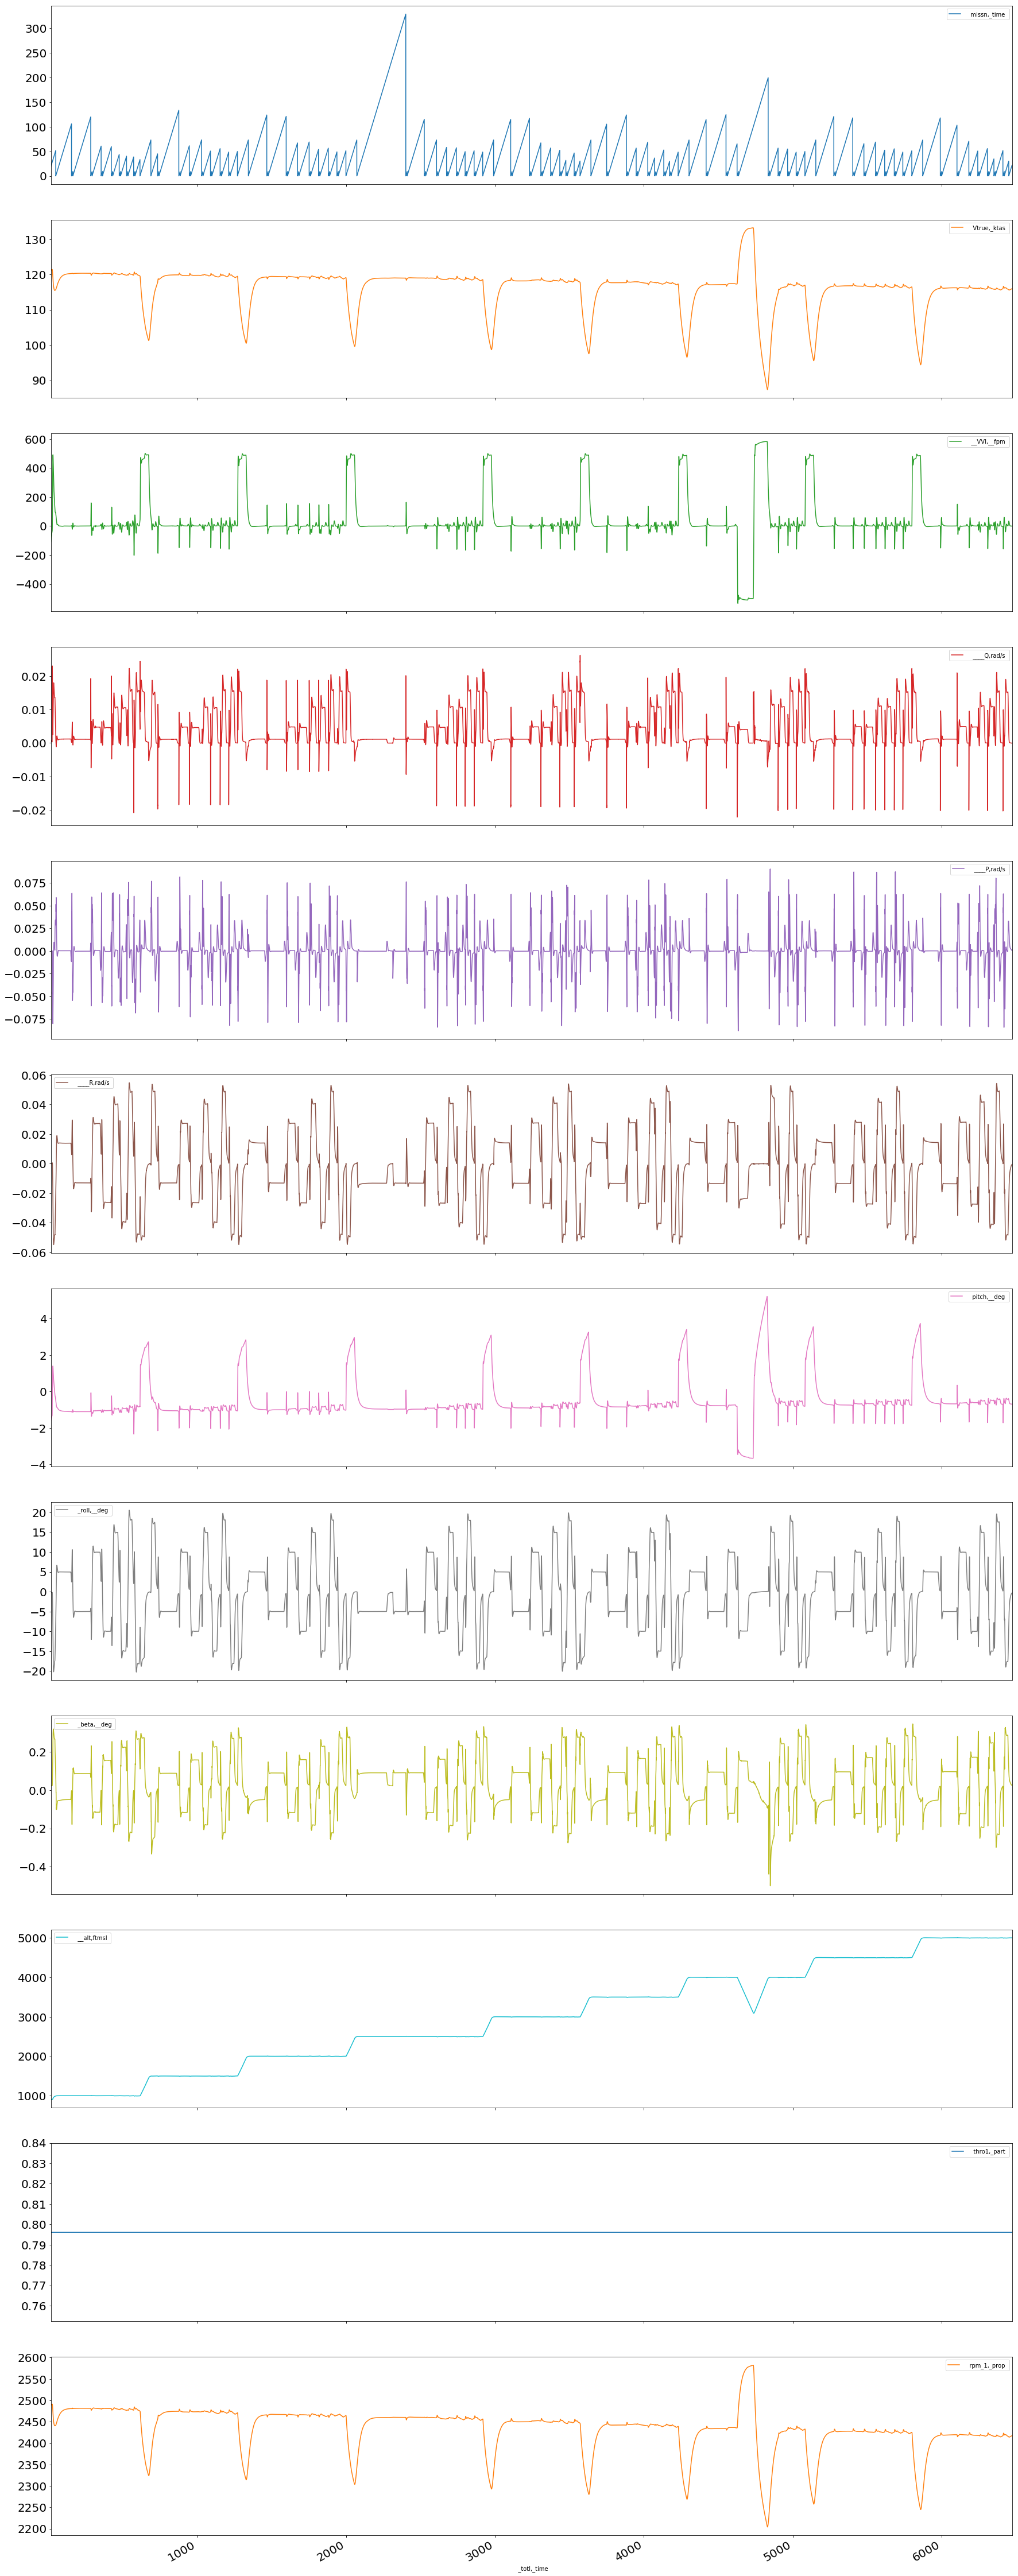

In [0]:
df.plot.line(x=t_time, subplots = True, figsize = (30, 90),  fontsize=20,legend=True )
save_plots_before_show('state_timeline')
plt.show()

### action

In [0]:
df_actions.describe()

,"_totl,_time","missn,_time","_elev,stick","ailrn,stick","ruddr,stick","_elev,astab","ailrn,astab","ruddr,astab","_elev,_surf","ailrn,_surf","ruddr,_surf","_elev,servo","ailrn,servo","ruddr,servo"
count,125032.000000,125032.000000,1.250320e+05,1.250320e+05,1.250320e+05,125032.0,125032.0,125032.0,125032.000000,125032.000000,125032.000000,125032.000000,125032.000000,125032.0
mean,3252.377780,44.428500,3.920000e-03,1.176000e-02,3.920000e-03,0.0,0.0,0.0,0.028107,0.004200,0.009327,-0.000011,-0.015554,0.0
std,1862.957656,47.399460,5.379399e-15,1.959205e-14,5.379399e-15,0.0,0.0,0.0,0.013555,0.021489,0.003562,0.001642,0.024087,0.0
min,18.922340,0.012780,3.920000e-03,1.176000e-02,3.920000e-03,0.0,-0.0,0.0,-0.035610,-0.096470,0.001100,-0.037550,-0.128660,0.0
25%,1641.939118,12.574667,3.920000e-03,1.176000e-02,3.920000e-03,0.0,-0.0,0.0,0.023220,0.001350,0.006880,-0.000080,-0.018500,0.0
50%,3256.095090,32.704520,3.920000e-03,1.176000e-02,3.920000e-03,0.0,-0.0,0.0,0.030230,0.004550,0.009380,-0.000000,-0.015240,0.0
75%,4865.086795,57.335300,3.920000e-03,1.176000e-02,3.920000e-03,0.0,-0.0,0.0,0.037410,0.007060,0.011000,0.000010,-0.012610,0.0
max,6471.113280,328.820160,3.920000e-03,1.176000e-02,3.920000e-03,0.0,-0.0,0.0,0.072690,0.113980,0.016740,0.037290,0.107010,0.0


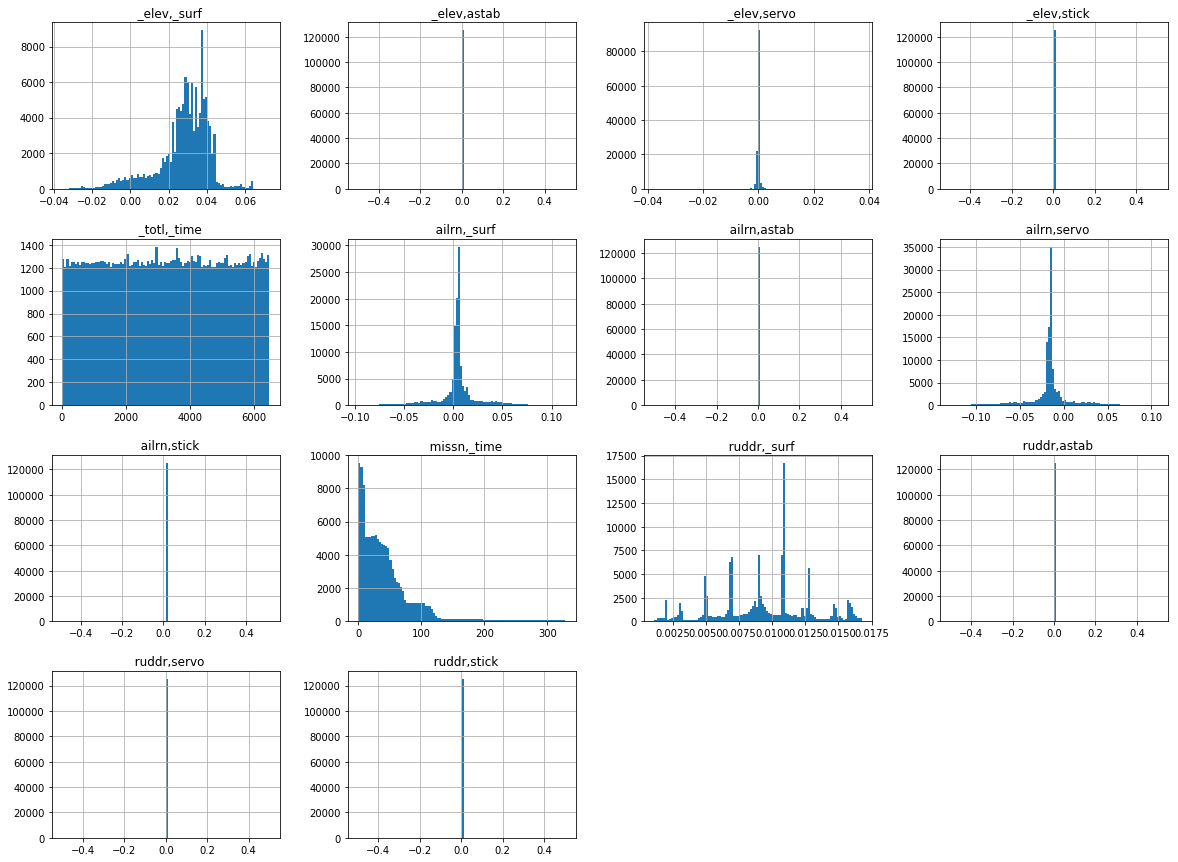

In [0]:
df_actions.hist(bins=100, figsize=(20,15))
save_plots_before_show('actions_histogramm')
plt.show()

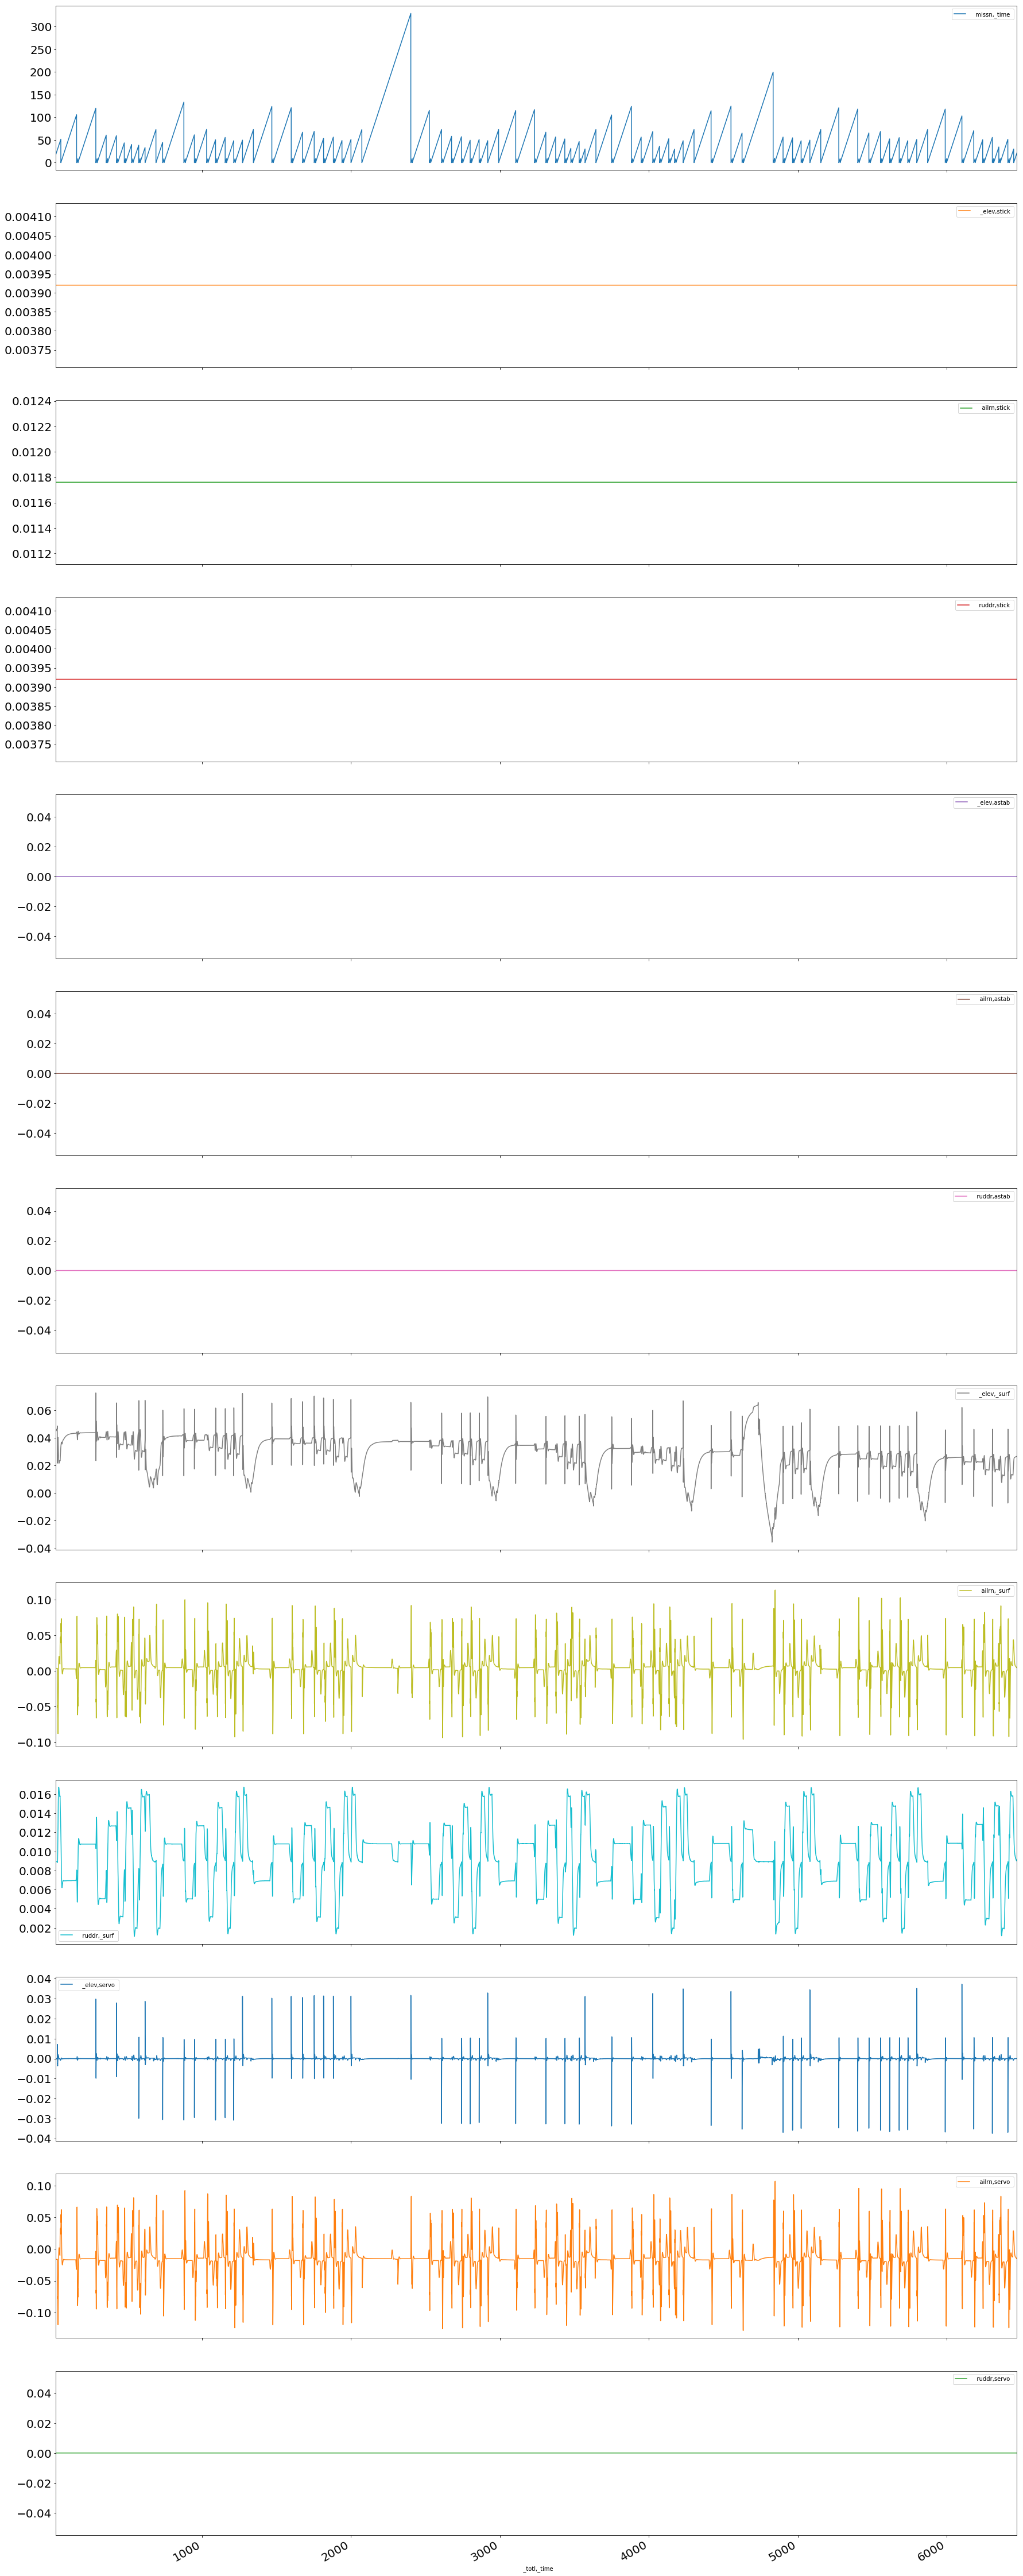

In [0]:
df_actions.plot.line(x=t_time, subplots = True, figsize = (30, 90), fontsize=20,legend=True )
save_plots_before_show('actions_timeline')
plt.show()


